## Features extraction

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import plotly.express as px
import subprocess
import os

In [4]:
LABELS = [
    "get, take",
    "place, place-on, place-back, put, put-back",
    "open",
    "close",
    "clean, wipe-off, wipe, wash, rinse",
    "cut, chop, slice",
    "mix, mix-around, stir, whisk",
    "pour"
]

In [69]:
if False:   

    # Assicurati di essere nella directory corretta
    os.chdir("C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision")
    # Comando da eseguire
    command = [
        'python', 'save_feat.py',
        'config=configs/I3D_save_feat.yaml',
        'dataset.shift=D1-D1',
        'dataset.RGB.data_path=D:/ek_data/frames',
        'save.dense_sampling.RGB=true',
        'save.num_frames_per_clip.RGB=5',
        'name=saved_feat_I3D_5_Dense'
    ]

    # Esegui il comando
    result = subprocess.run(command, capture_output=True, text=True)

    # Stampa l'output e l'errore
    print('Output:', result.stdout)
    #print('Error:', result.stderr)

    # Verifica il codice di uscita
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')

In [3]:
# Assicurati di essere nella directory corretta
path1 = "/Users/andreavannozzi/GithubProjects/Egocentric-Vision"
path2 = "C:/Users/iplov/Desktop/Advanced ML/Progetto/github andrew/Egocentric-Vision"
os.chdir(path1)
num_frames_list = [5,10,25]
#DENSE
if True:
    for n in num_frames_list:
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=/ek_data/frames',
            'save.dense_sampling.RGB=true',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_dense'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

    #UNIFORM
    for n in num_frames_list:
        print(f"UNIFORM n = {n}")
        # Comando da eseguire
        command = [
            'python', 'save_feat.py',
            'config=configs/I3D_save_feat.yaml',
            'dataset.shift=D1-D1',
            'dataset.RGB.data_path=D:/ek_data/frames',
            'save.dense_sampling.RGB=false',
            f'save.num_frames_per_clip.RGB={n}',
            f'name=saved_feat_I3D_{n}_uniform'
        ]

        # Esegui il comando
        result = subprocess.run(command, capture_output=True, text=True)

        # Stampa l'output e l'errore
        print('Output:', result.stdout)
        #print('Error:', result.stderr)

        # Verifica il codice di uscita
        if result.returncode != 0:
            print(f'Command failed with return code {result.returncode}')

UNIFORM n = 25
Output: Using device: cpu



## Read extracted feature

In [3]:
features = pd.read_pickle("./saved_features/saved_feat_I3D_10_dense_D1_test.pkl")
#print(features['features'][0])
print(len(features['features']))
#print(features['features'][0]['features_RGB'])
#print(features['features'][0]['label'])
print(features['features'][0].keys())
list_of_features = [np.mean(np.array(feature['features_RGB']),axis=0) for feature in features["features"]]
clips_feature = list_of_features
labels = [feature['label'] for feature in features["features"]]
print(max(labels))

FileNotFoundError: [Errno 2] No such file or directory: './saved_features/saved_feat_I3D_10_dense_D1_test.pkl'

# K-Means

In [5]:
clips_feature_tensor = np.array(clips_feature)

print(clips_feature_tensor.shape)

(435, 1024)


## plot using TSNE 2D

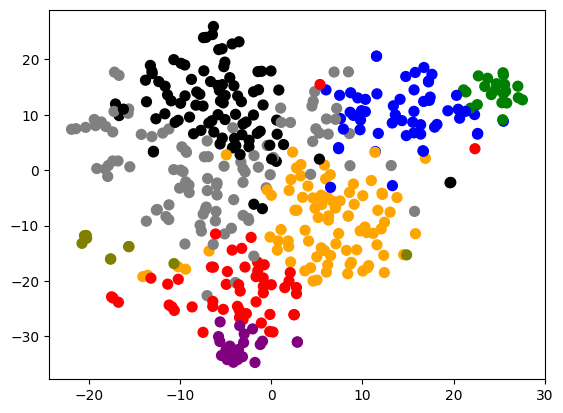

In [8]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive'])

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=2, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap=cmap, s=50)

plt.show()


## plot using TSNE 3D

In [25]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)
cmap = ['blue', 'orange', 'green', 'red', 'purple', 'gray', 'black', 'olive']

y_kmeans = kmeans.predict(clips_feature_tensor)

tsne = TSNE(n_components=3, random_state=42)
# Addestrare il modello e trasformare i dati
X = tsne.fit_transform(clips_feature_tensor)
# scatter plot of X values

fig = px.scatter_3d(X, x=0, y=0, z=2, labels=y_kmeans)
fig.update_traces(marker_size=8)
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'hovertemplate': '0=%{y}<br>2=%{z}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'size': 8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([ 6.2738123, -1.041547 , -3.5783281, ..., 21.035023 , 23.155897 ,
                           6.1270323], dtype=float32),
              'y': array([ 6.2738123, -1.041547 , -3.5783281, ..., 21.035023 , 23.155897 ,
                           6.1270323], dtype=float32),
              'z': array([  8.1309395,  -7.6845   , -13.522694 , ...,  36.366394 ,  33.34589  ,
                           20.284233 ], dtype=float32)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                     

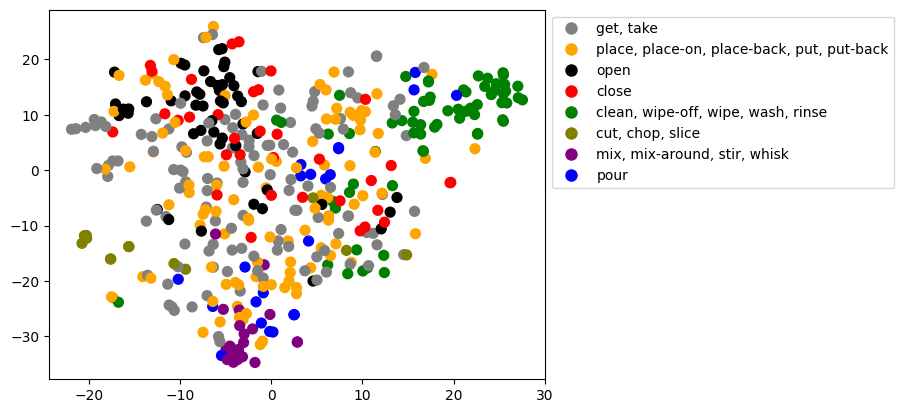

In [16]:
cmap = ListedColormap(['gray', 'orange', 'black', 'red', 'green', 'olive', 'purple', 'blue'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                for i, desc in enumerate(LABELS)]

# scatter plot of X values
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=50)
# Add the legend
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## PROVA

In [10]:
if False:
    # Comando da eseguire
    command = [
        'python', 'save_feat.py',
        'config=configs/I3D_save_feat.yaml',
        'dataset.shift=D1-D1',
        'dataset.RGB.data_path=D:/ek_data/frames',
        'save.dense_sampling.RGB=false',
        f'save.num_frames_per_clip.RGB=16',
        f'name=PROVA'
    ]

    # Esegui il comando
    result = subprocess.run(command, capture_output=True, text=True)

    # Stampa l'output e l'errore
    print('Output:', result.stdout)
    #print('Error:', result.stderr)

    # Verifica il codice di uscita
    if result.returncode != 0:
        print(f'Command failed with return code {result.returncode}')

Output: Using device: cpu

Command failed with return code 1
